# Sounds as Vectors

In [16]:
import numpy as np
import matplotlib.pyplot as pt

from html5_audio import DEFAULT_RATE, get_html5_wave_player

Here's a function that produces a 'beep' with a parabola as an 'envelope':

In [17]:
def make_beep(freq, duration=0.3):
    nsamples = DEFAULT_RATE * duration

    t = np.linspace(0, duration, nsamples)
    data = np.sin(freq*2*np.pi*t)

    ramp = np.linspace(0, 1, nsamples)
    data = data * (1-ramp)**2
    
    return data

Let's put one into the variable `beep`:

In [18]:
beep = make_beep(440)

It's just a numpy array:

In [19]:
type(beep)

numpy.ndarray

A pretty long one though:

In [20]:
beep.shape

(13230,)

Let's take a look:

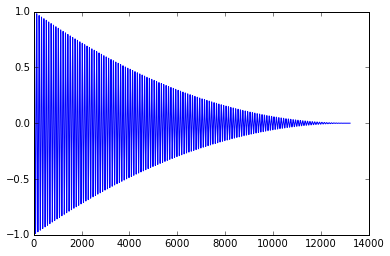

In [21]:
pt.plot(beep)

This consists of 44100 'samples' (=data points) per second of sound.

In [22]:
get_html5_wave_player(beep)

-----------------------
Can we compose some simple 'music' with this? Let's shoot for three seconds...

In [10]:
music = np.zeros(DEFAULT_RATE * 3, dtype=np.float32)

In [23]:
beep1 = make_beep(880, duration=0.8)
beep2 = make_beep(880 * 1.5, duration=0.8)
beep3 = make_beep(880 * 2, duration=0.8)
l = len(beep1)

In [24]:
music.fill(0)
music[0:l] += beep1
s = int(0.3*DEFAULT_RATE)
music[s:s+l] += 0.1*beep2
s = int(0.6*DEFAULT_RATE)
music[s:s+l] += 0.5*beep3

In [25]:
get_html5_wave_player(0.3*music)